## Prediction of death event due to heart failure given the patient's medical records.

This is a binary classification problem, predicting whether the patient had died or not given the medical records.

This dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

Features:
age: age of the patient in years;
anaemia: decrease of red blood cells or hemoglobin (binary);
creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L);
diabetes: if the patient has diabetes (binary);
ejection fraction: percentage of blood leaving the heart at each contraction (percentage);
high blood pressure: if the patient has hypertension (binary);
platelets: platelets count (kiloplatelets/mL);
sex: woman or man (binary);
serum creatinine: level of serum creatinine in the blood (mg/dL);
serum sodium: level of serum sodium in the blood (mEq/L);
smoking: if the patient smokes or not (binary);
time: follow-up period (days);
(Target) DEATH_EVENT: if the patient died during the follow-up period (binary);
Citation:
Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading the data
data = pd.read_csv(r'/content/heart_failure_clinical_records.csv')
print(data.head(), data.shape, '\n')

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

In [3]:
## checking the datatype of features and any null values
print(data.info(), '\n')
print(data.isna().sum(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None 

age     

In [4]:
## counting the number of float values in the age column
print('The count of float values in the age column is',(data['age'] % 1 != 0).sum())

The count of float values in the age column is 46


In [5]:
## converting the age column to integer type
data['age'] = data['age'].astype(int)

In [6]:
print(data.describe().T)

                           count           mean           std      min  \
age                       5000.0      60.282600     11.697218     40.0   
anaemia                   5000.0       0.474400      0.499394      0.0   
creatinine_phosphokinase  5000.0     586.760600    976.733979     23.0   
diabetes                  5000.0       0.439400      0.496364      0.0   
ejection_fraction         5000.0      37.734600     11.514855     14.0   
high_blood_pressure       5000.0       0.364800      0.481422      0.0   
platelets                 5000.0  265075.404370  97999.758622  25100.0   
serum_creatinine          5000.0       1.369106      1.009750      0.5   
serum_sodium              5000.0     136.808200      4.464236    113.0   
sex                       5000.0       0.645600      0.478379      0.0   
smoking                   5000.0       0.311800      0.463275      0.0   
time                      5000.0     130.678800     77.325928      4.0   
DEATH_EVENT               5000.0      

From this, we could see that the creatine_phosphokinase has a 75% percentile value as 582 but a max value of 7861. May be some outliers are present. And for platelets column, feature scaling is required during model training. Let's look at the distribution of data.

In [7]:
#checking for duplicate values
duplicated = data[data.duplicated()]

In [8]:
print(f'There are {duplicated.shape[0]} duplicate entries in this dataset')
data.drop_duplicates(inplace = True)
print(f'The dataset shape after removing duplicates is {data.shape}')

There are 3680 duplicate entries in this dataset
The dataset shape after removing duplicates is (1320, 13)


In [9]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


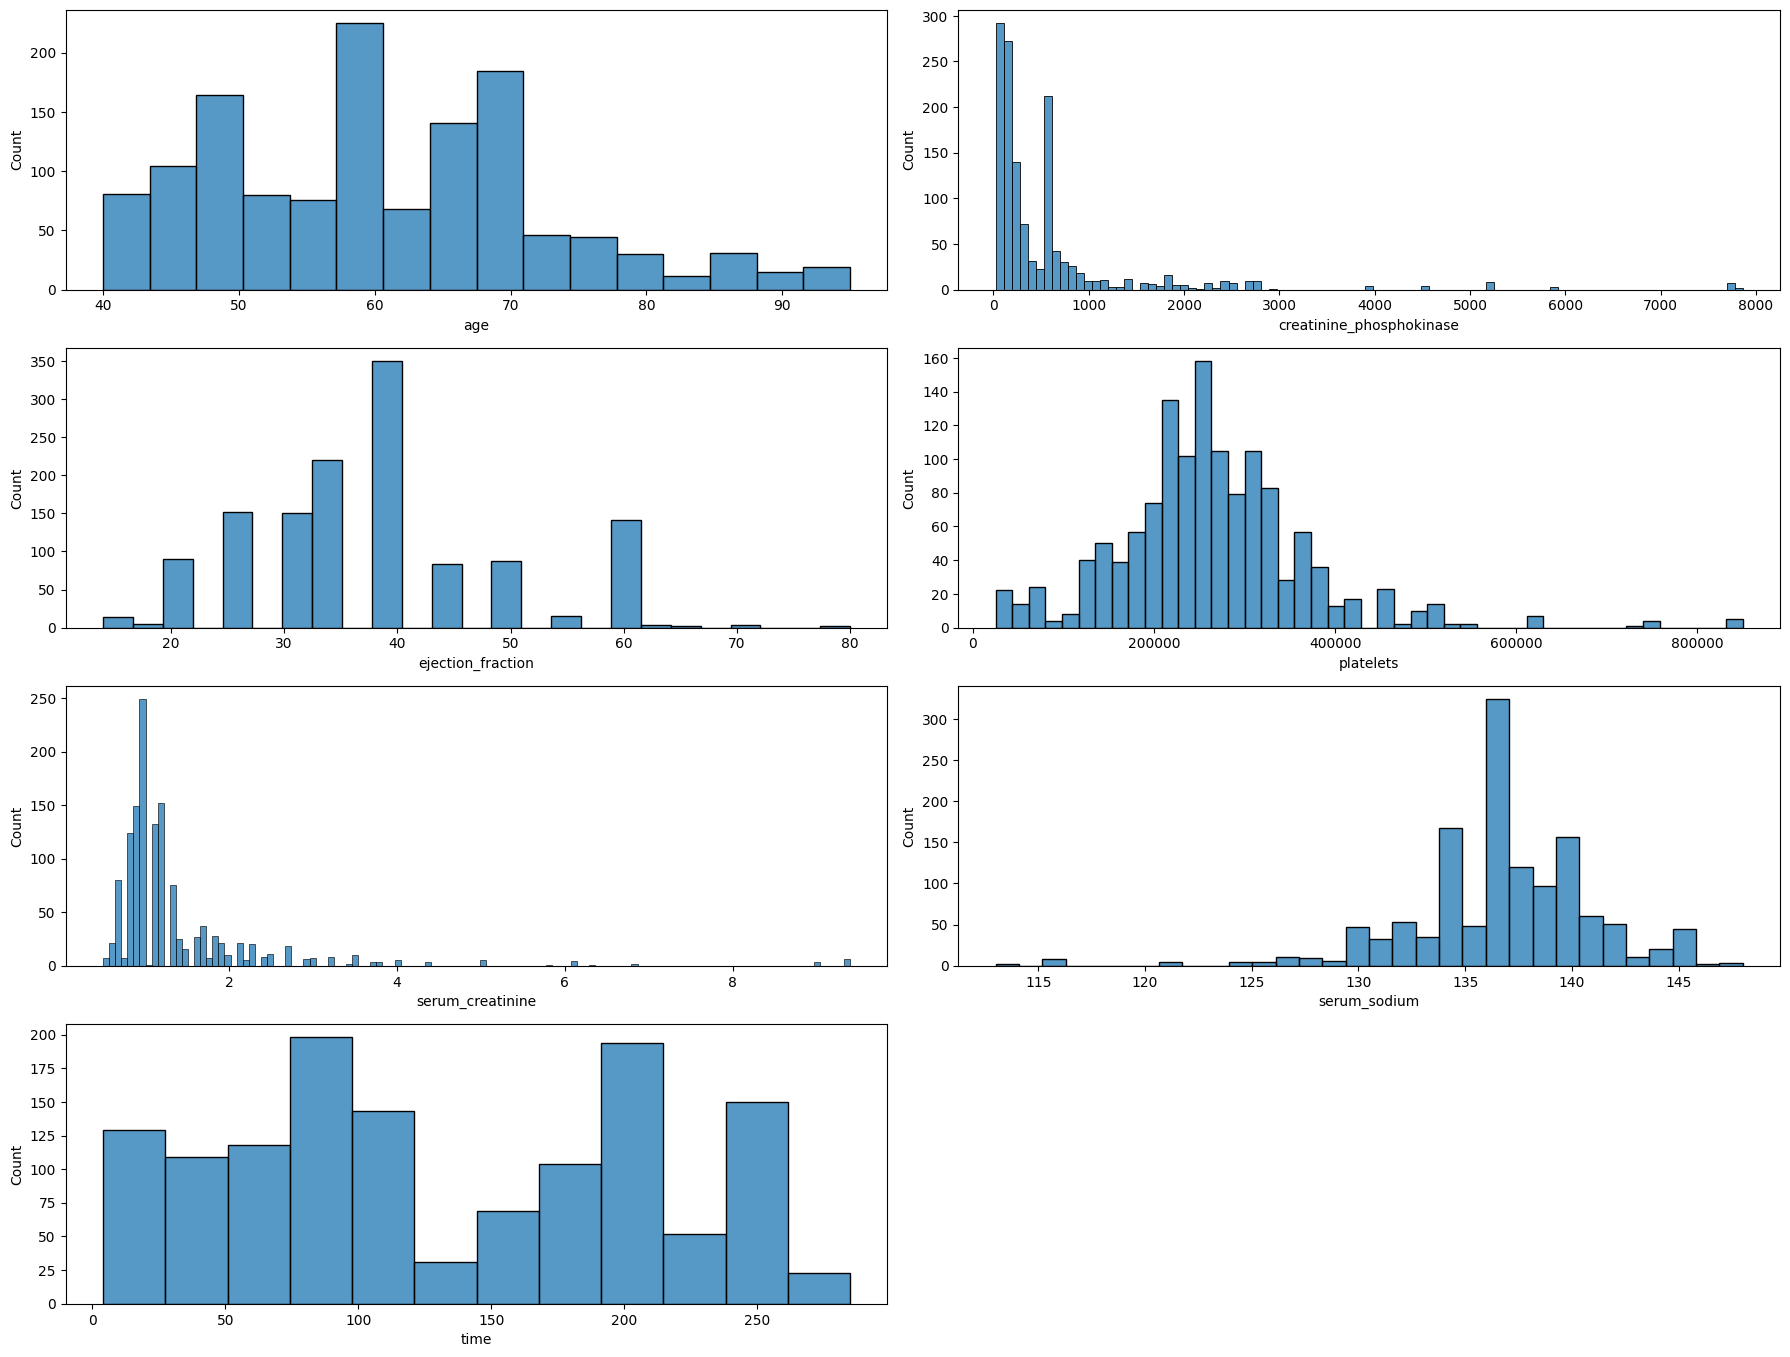

In [10]:
# Distplot
plt.figure(figsize=(18,20))
selected_columns = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine','serum_sodium','time']
for idx,i in enumerate(selected_columns):
    plt.subplot(6,2,idx+1)
    sns.histplot(data[i])
    plt.tight_layout()


Some of the data are right skewed and some are left skewed. Let's examine the skewness value of each column using the skew method available from scipy.stats.

In [11]:
from scipy.stats import skew
for i in selected_columns:
  print(f'The skewness of the column {i} is {skew(data[i])}')

The skewness of the column age is 0.4775477828911402
The skewness of the column creatinine_phosphokinase is 4.430551919731169
The skewness of the column ejection_fraction is 0.48651051710365883
The skewness of the column platelets is 1.128783786574607
The skewness of the column serum_creatinine is 4.688692735668503
The skewness of the column serum_sodium is -1.0531355681197605
The skewness of the column time is 0.09170501401408301


If the skewness value is above +1  or below -1, then the data is either right-skewed or left-skewed. If it is between +0.5 and -0.5, then moderately skewed. If close to zero, then the data is close to normal distribution. Here, the column creatinine_phosphokinase, platelets, serum_creatinine is right-skewed and the column serum_sodium is slighly skewed to the left.

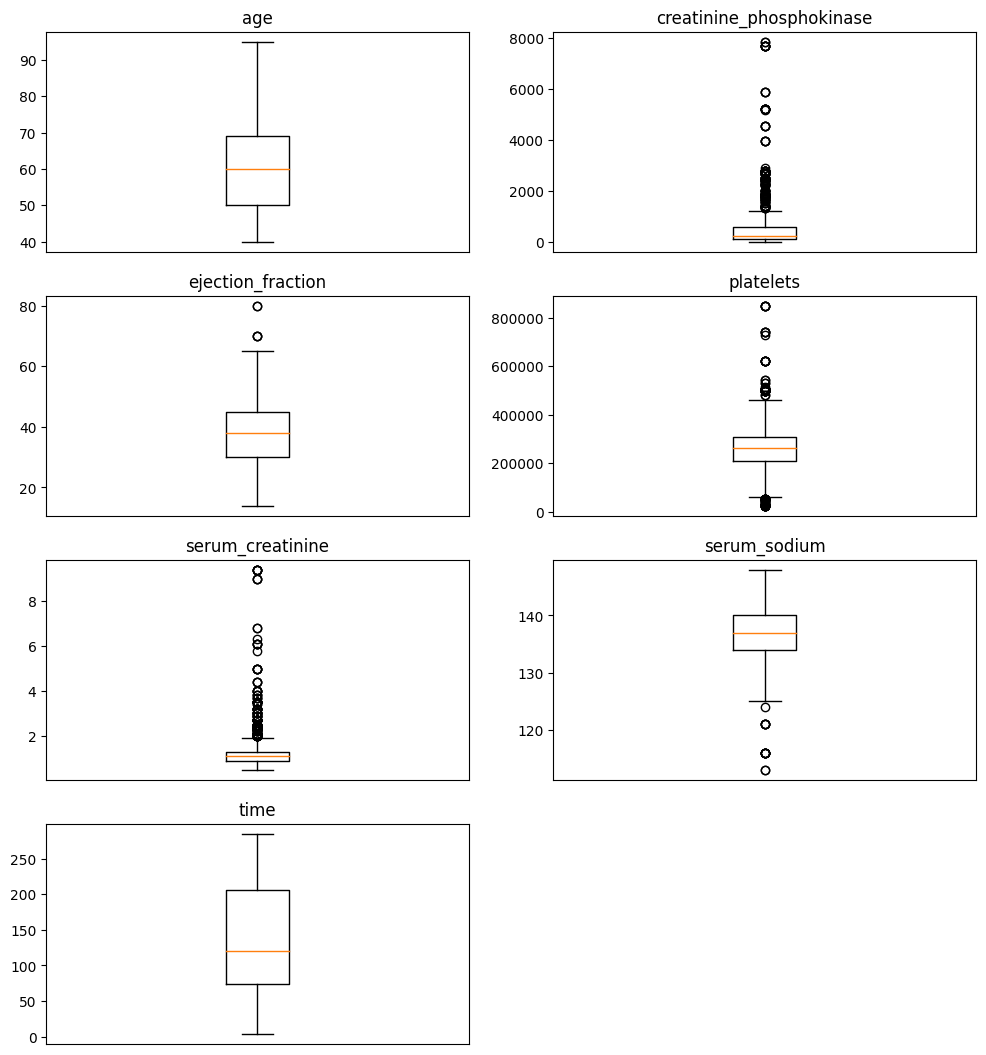

In [12]:
#creating a box plot to visualize outliers
plt.figure(figsize = (12,20))
for idx,i in enumerate(selected_columns):
    plt.subplot(6,2,idx+1)
    plt.boxplot(data[i])
    plt.xticks([])
    plt.title(i)

The outliers are present in the creatinine_phosphokinase, platelets, serum_creatinine and the serum_sodium column.

In [13]:
# removing outliers from sensors using IQR method:
def remove_outliers(outlier_columns, df):
  for col in outlier_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - (1.5*iqr)
    upper_limit = q3 + (1.5*iqr)
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
  return df

In [14]:
outlier_columns = ['creatinine_phosphokinase','platelets', 'serum_creatinine','serum_sodium']

data = remove_outliers(outlier_columns, data)

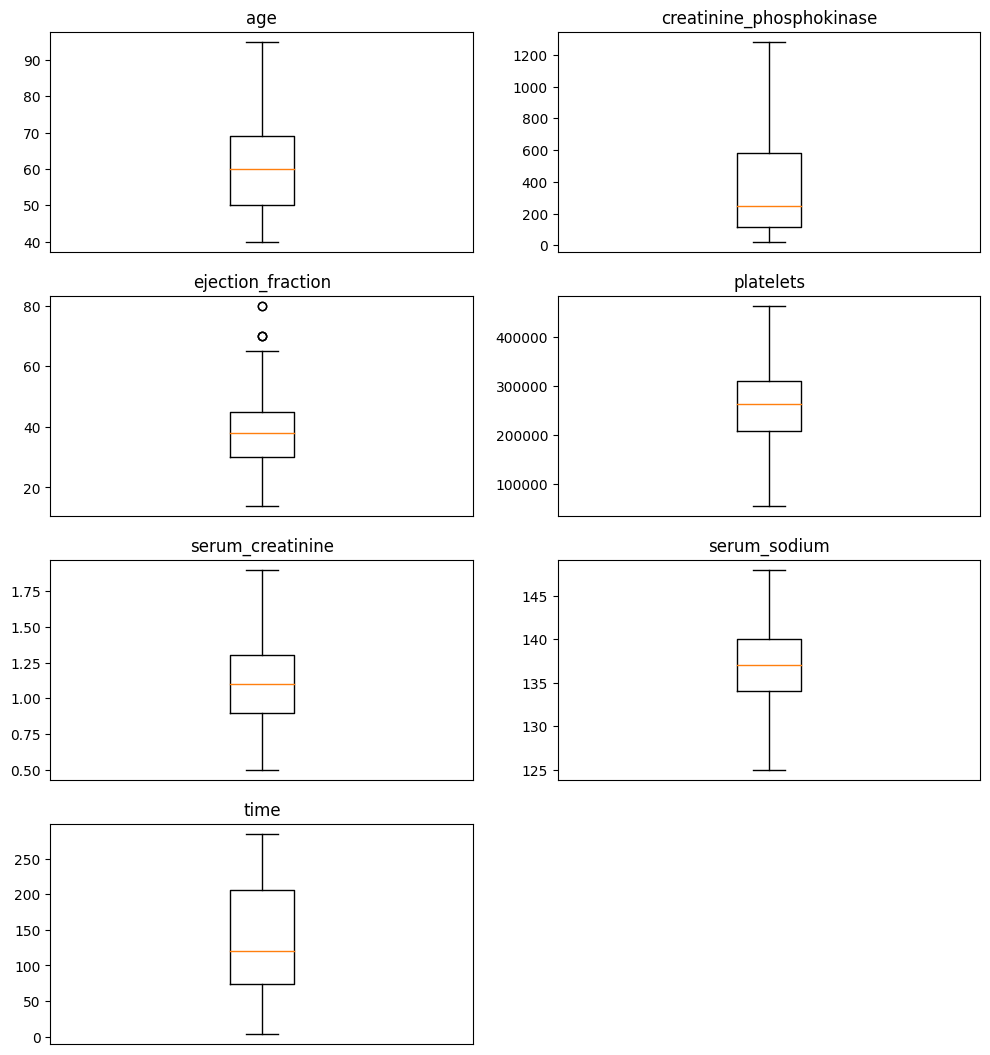

In [15]:
#creating a box plot to visualize after treating outliers
plt.figure(figsize = (12,20))
for idx,i in enumerate(selected_columns):
    plt.subplot(6,2,idx+1)
    plt.boxplot(data[i])
    plt.xticks([])
    plt.title(i)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']] = scaler.fit_transform(data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']])

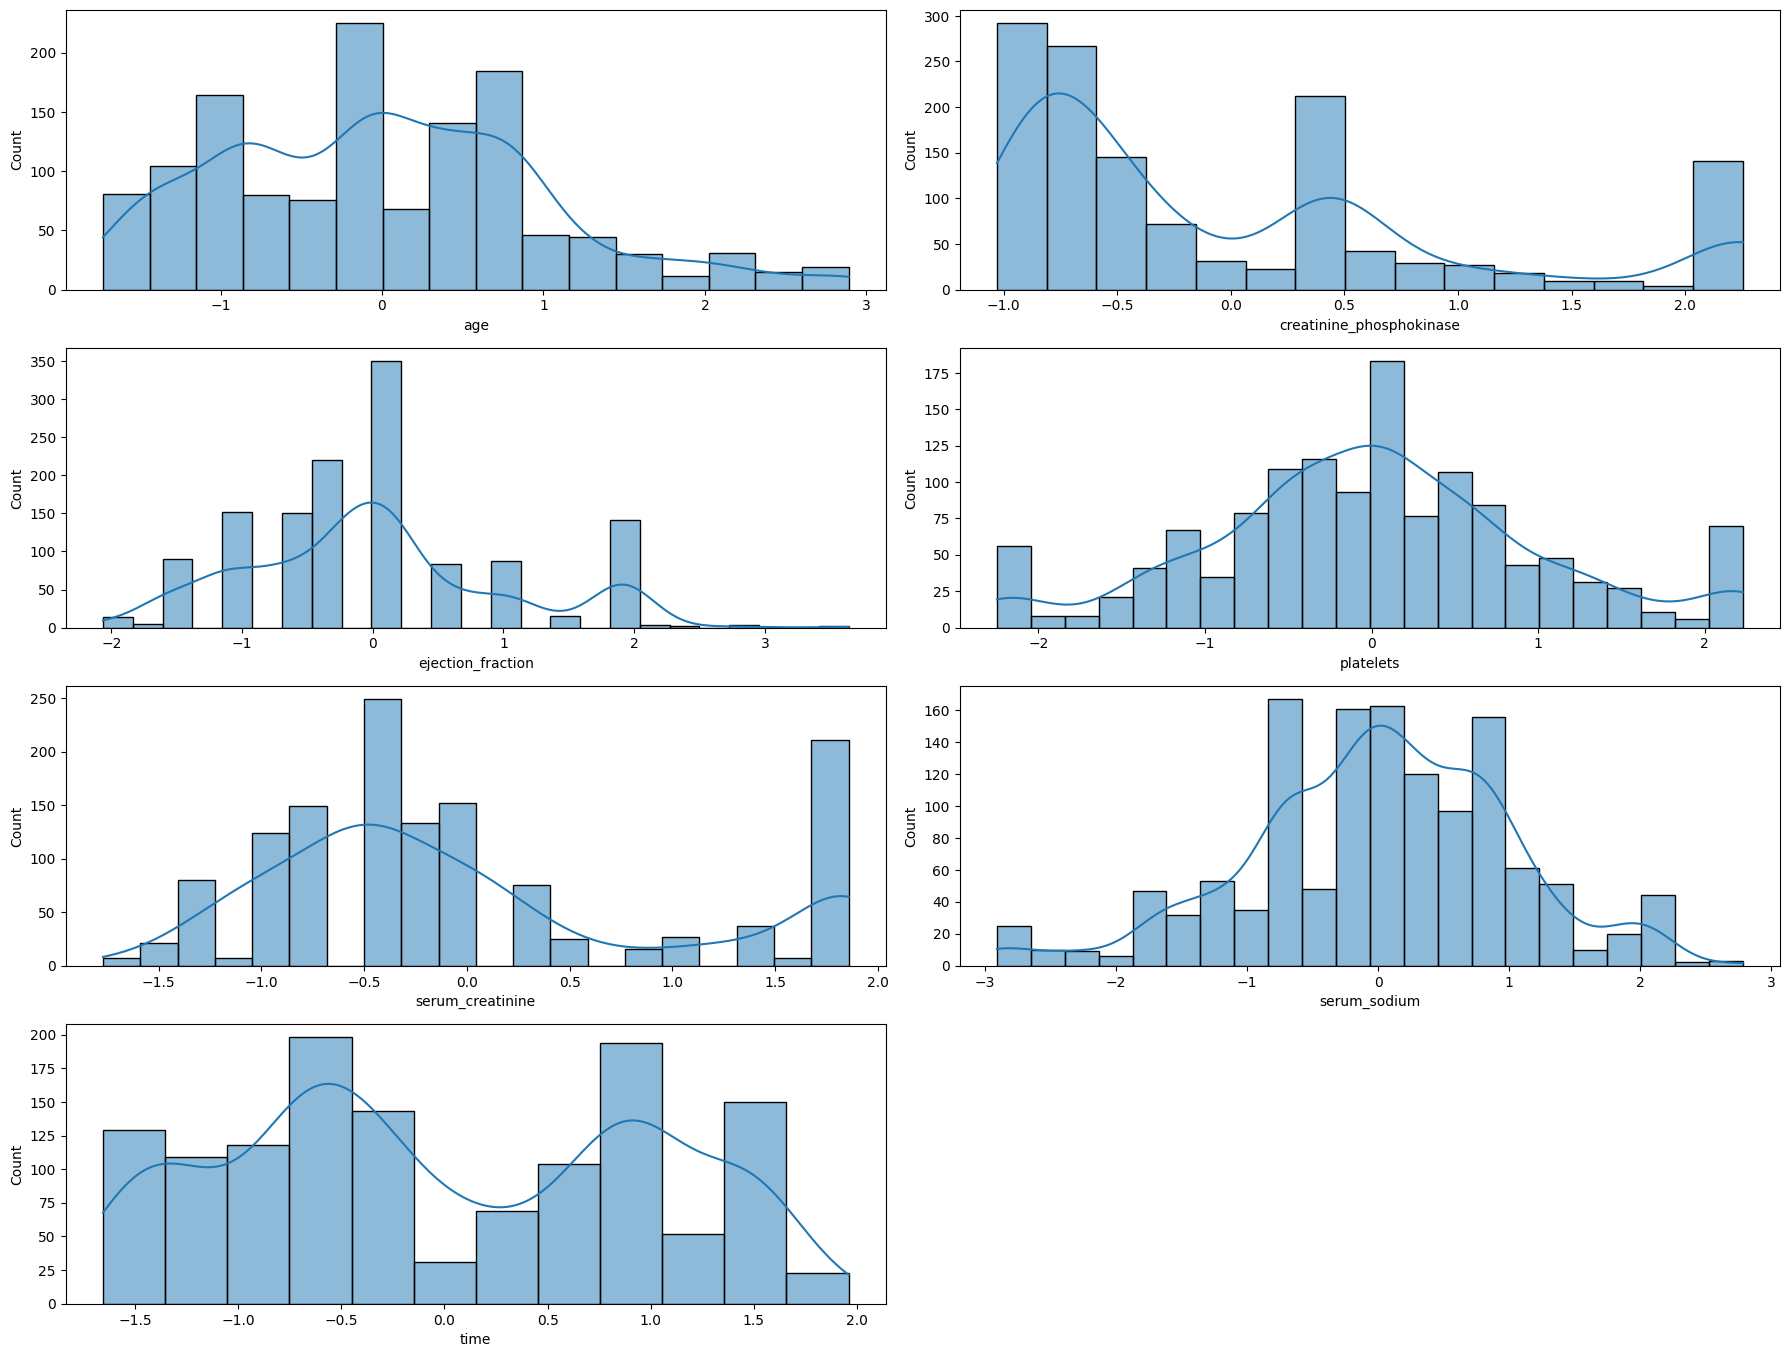

In [17]:
# Visualising the Distributions after scaling and outliers treatment
plt.figure(figsize=(18,20))
selected_columns = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine','serum_sodium','time']
for idx,i in enumerate(selected_columns):
    plt.subplot(6,2,idx+1)
    sns.histplot(data[i],kde = 'True')
    plt.tight_layout()

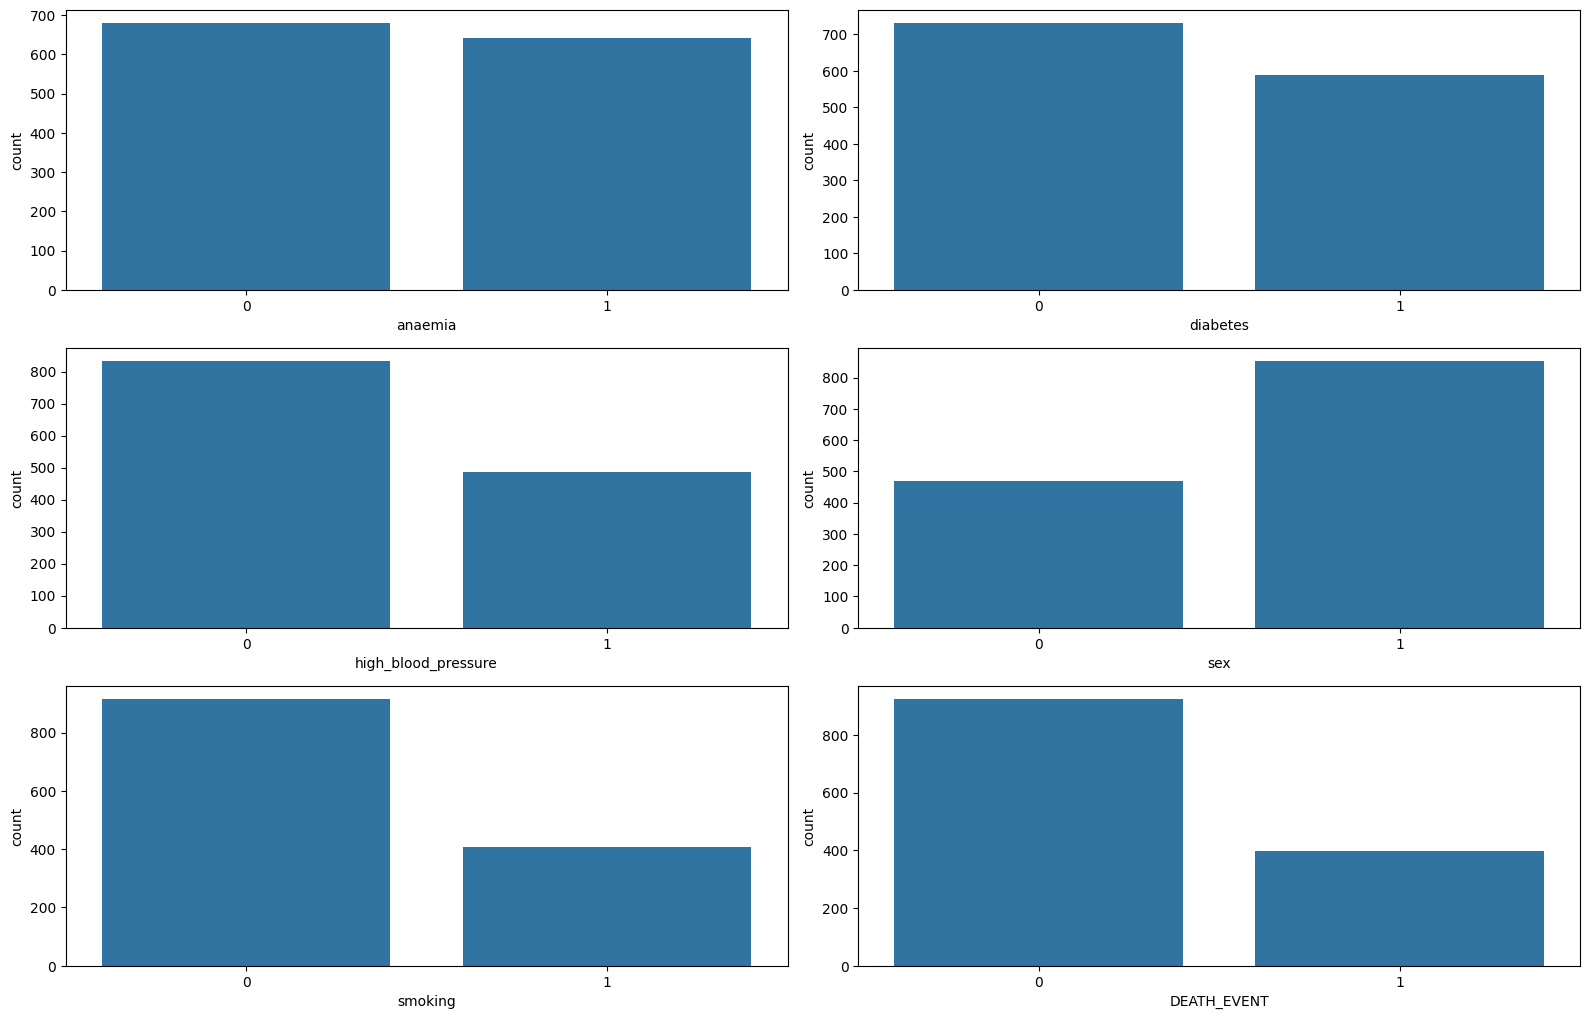

In [18]:
# Visualising the Distributions after outliers treatment
plt.figure(figsize=(16,20))
categ_columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
for idx,i in enumerate(categ_columns):
    plt.subplot(6,2,idx+1)
    sns.countplot(x= data[i], orient= 'h')
    plt.tight_layout()

<Axes: >

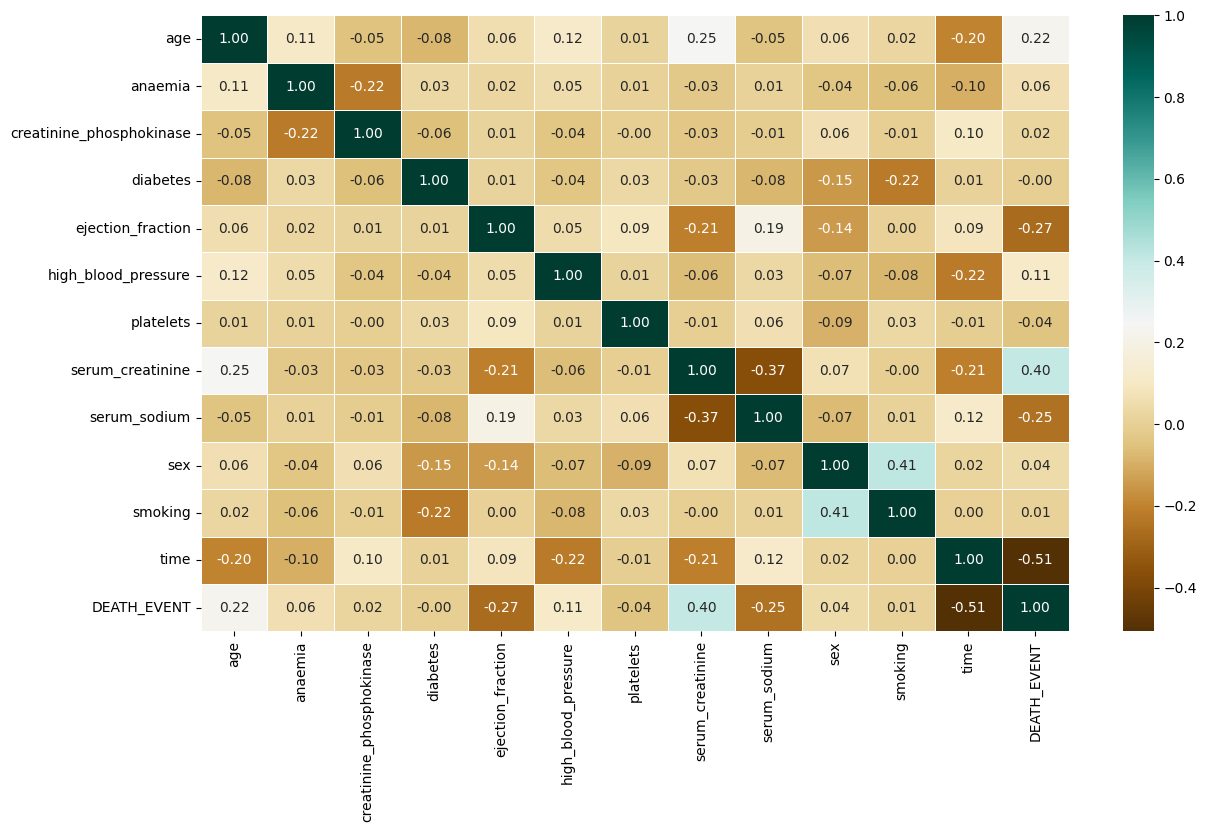

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot_kws={"size": 10} ,annot=True, fmt=".2f", cmap='BrBG', linewidth=.5)

From the correlation plot, we could infer there is a positive relationship between the gender and smoking. And slight negative relation between the serum_creatinine and serum_sodium.

<Axes: xlabel='sex', ylabel='smoking'>

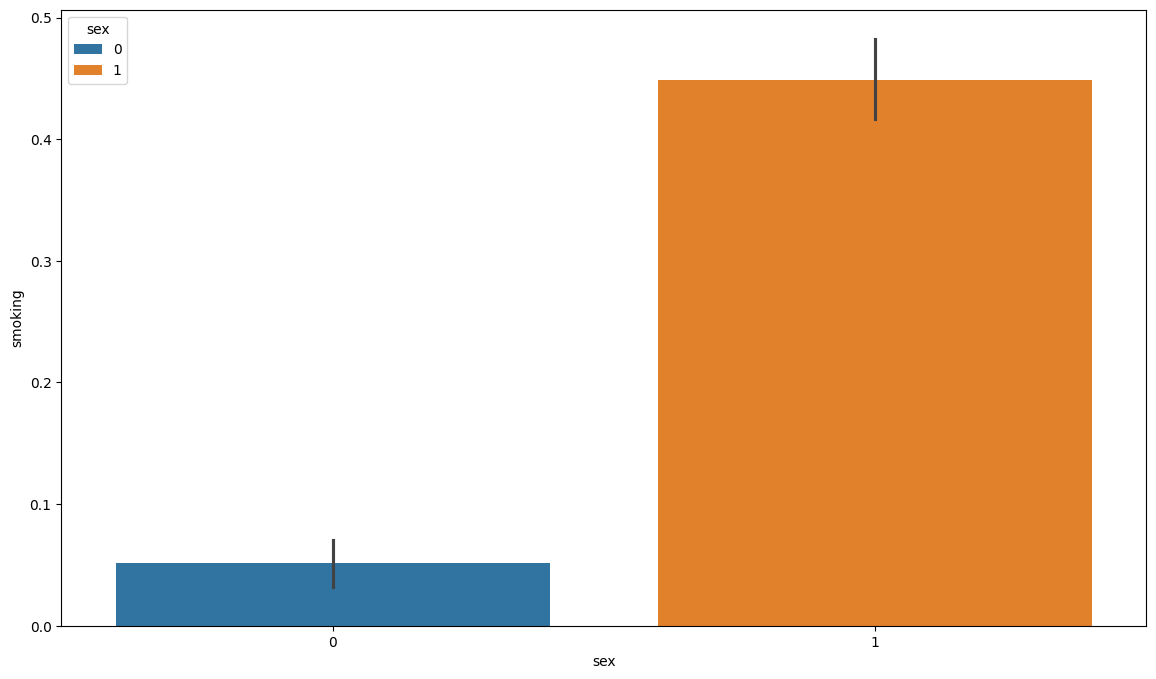

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(x='sex', y='smoking', hue='sex', data=data)

## Naive Bayes Classifier Assumptions
1. Features are independent of each other, meaning there is no correlation between features.

2. Feature Distribution: Continuous features are normally distributed and discrete features have a multinomial distribution.

Lets implement a Naive Bayes Classifier


In [21]:
bayes_data = data.copy()
for i in selected_columns:
  num_bins = 20
  bins = np.linspace(bayes_data[i].min(), bayes_data[i].max(), num_bins + 1)
  bin_ids = np.digitize(bayes_data[i], bins)
  bayes_data[i] = bin_ids

Naive Bayes model training accuracy: 83.80681818181817
Naive Bayes model test accuracy: 81.43939393939394

The classification report of the model 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       194
           1       0.64      0.69      0.66        70

    accuracy                           0.81       264
   macro avg       0.76      0.77      0.77       264
weighted avg       0.82      0.81      0.82       264

The confusion matrix 
 [[167  27]
 [ 22  48]]


<Axes: >

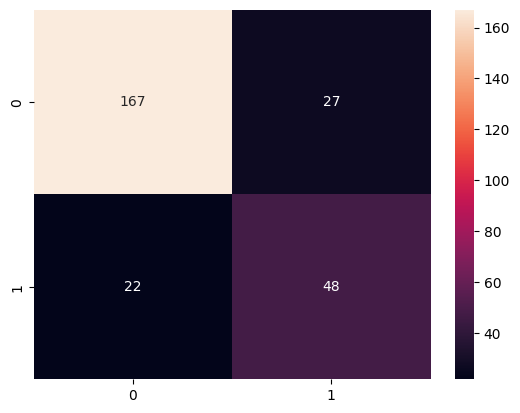

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x = bayes_data.drop(labels = ['smoking','DEATH_EVENT'], axis = 1)
y = bayes_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

print("Naive Bayes model training accuracy:", accuracy_score(y_train, y_train_pred)*100)
print("Naive Bayes model test accuracy:", accuracy_score(y_test, y_pred)*100)


print('\nThe classification report of the model \n',classification_report(y_test, y_pred))
print('The confusion matrix \n',confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt=".0f")



Naive Bayes classifier is not an optimal choice of algorithm for this data having both discrete and continuous features. And also the features are not conditionally independent. I created 20 category bins for continuous variables like 'age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine','serum_sodium' and 'time'. During Train and test split, I removed the features having some correlation to avoid violating the classifier conditions.

The training accuracy and test accuracy indicates there is no overfitting but the model could not classify all the data correctly.

Let's us try other classification algorithms like Logistic Regression, SVM, Decision Trees and analyze their performance.

##Logistic Regression

The training accuracy of the model using Logistic Regression is 84.6590909090909
The test accuracy of the model using Logistic Regression is 82.1969696969697

The classification report of the model 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       194
           1       0.69      0.59      0.64        70

    accuracy                           0.82       264
   macro avg       0.78      0.75      0.76       264
weighted avg       0.82      0.82      0.82       264

The confusion matrix 
 [[176  18]
 [ 29  41]]


<Axes: >

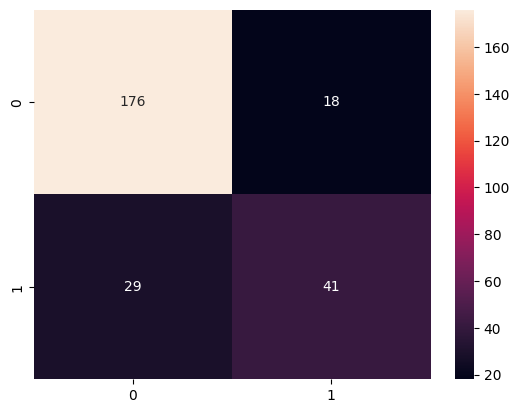

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg_data = data.copy()

x = log_reg_data.drop(labels = ['smoking','DEATH_EVENT'], axis =1)
y = log_reg_data['DEATH_EVENT']


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)
log_classifier = LogisticRegression(solver = 'liblinear',random_state = 42)
log_classifier.fit(X_train,y_train)


y_pred = log_classifier.predict(X_test)
train_accuracy = log_classifier.score(X_train, y_train)
test_accuracy = log_classifier.score(X_test, y_test)

print(f'The training accuracy of the model using Logistic Regression is {train_accuracy*100}')
print(f'The test accuracy of the model using Logistic Regression is {test_accuracy*100}')
print('\nThe classification report of the model \n',classification_report(y_test, y_pred))
print('The confusion matrix \n',confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt=".0f")

The Logistic Regression model performs similarly to Naive Bayes classier.

Decision-tree model training accuracy: 99.90530303030303
Decision-tree model test accuracy: 94.31818181818183

The classification report of the model 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       194
           1       0.87      0.93      0.90        70

    accuracy                           0.94       264
   macro avg       0.92      0.94      0.93       264
weighted avg       0.95      0.94      0.94       264

The confusion matrix 
 [[184  10]
 [  5  65]]


<Axes: >

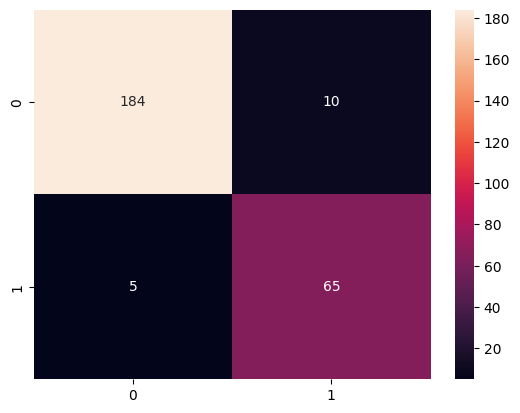

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_data = data.copy()

x = tree_data.drop(labels = ['smoking','DEATH_EVENT'], axis =1)
y = tree_data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train,y_train)

y_train_pred = tree_classifier.predict(X_train)
y_pred = tree_classifier.predict(X_test)

print("Decision-tree model training accuracy:", accuracy_score(y_train, y_train_pred)*100)
print("Decision-tree model test accuracy:", accuracy_score(y_test, y_pred)*100)


print('\nThe classification report of the model \n',classification_report(y_test, y_pred))
print('The confusion matrix \n',confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt=".0f")

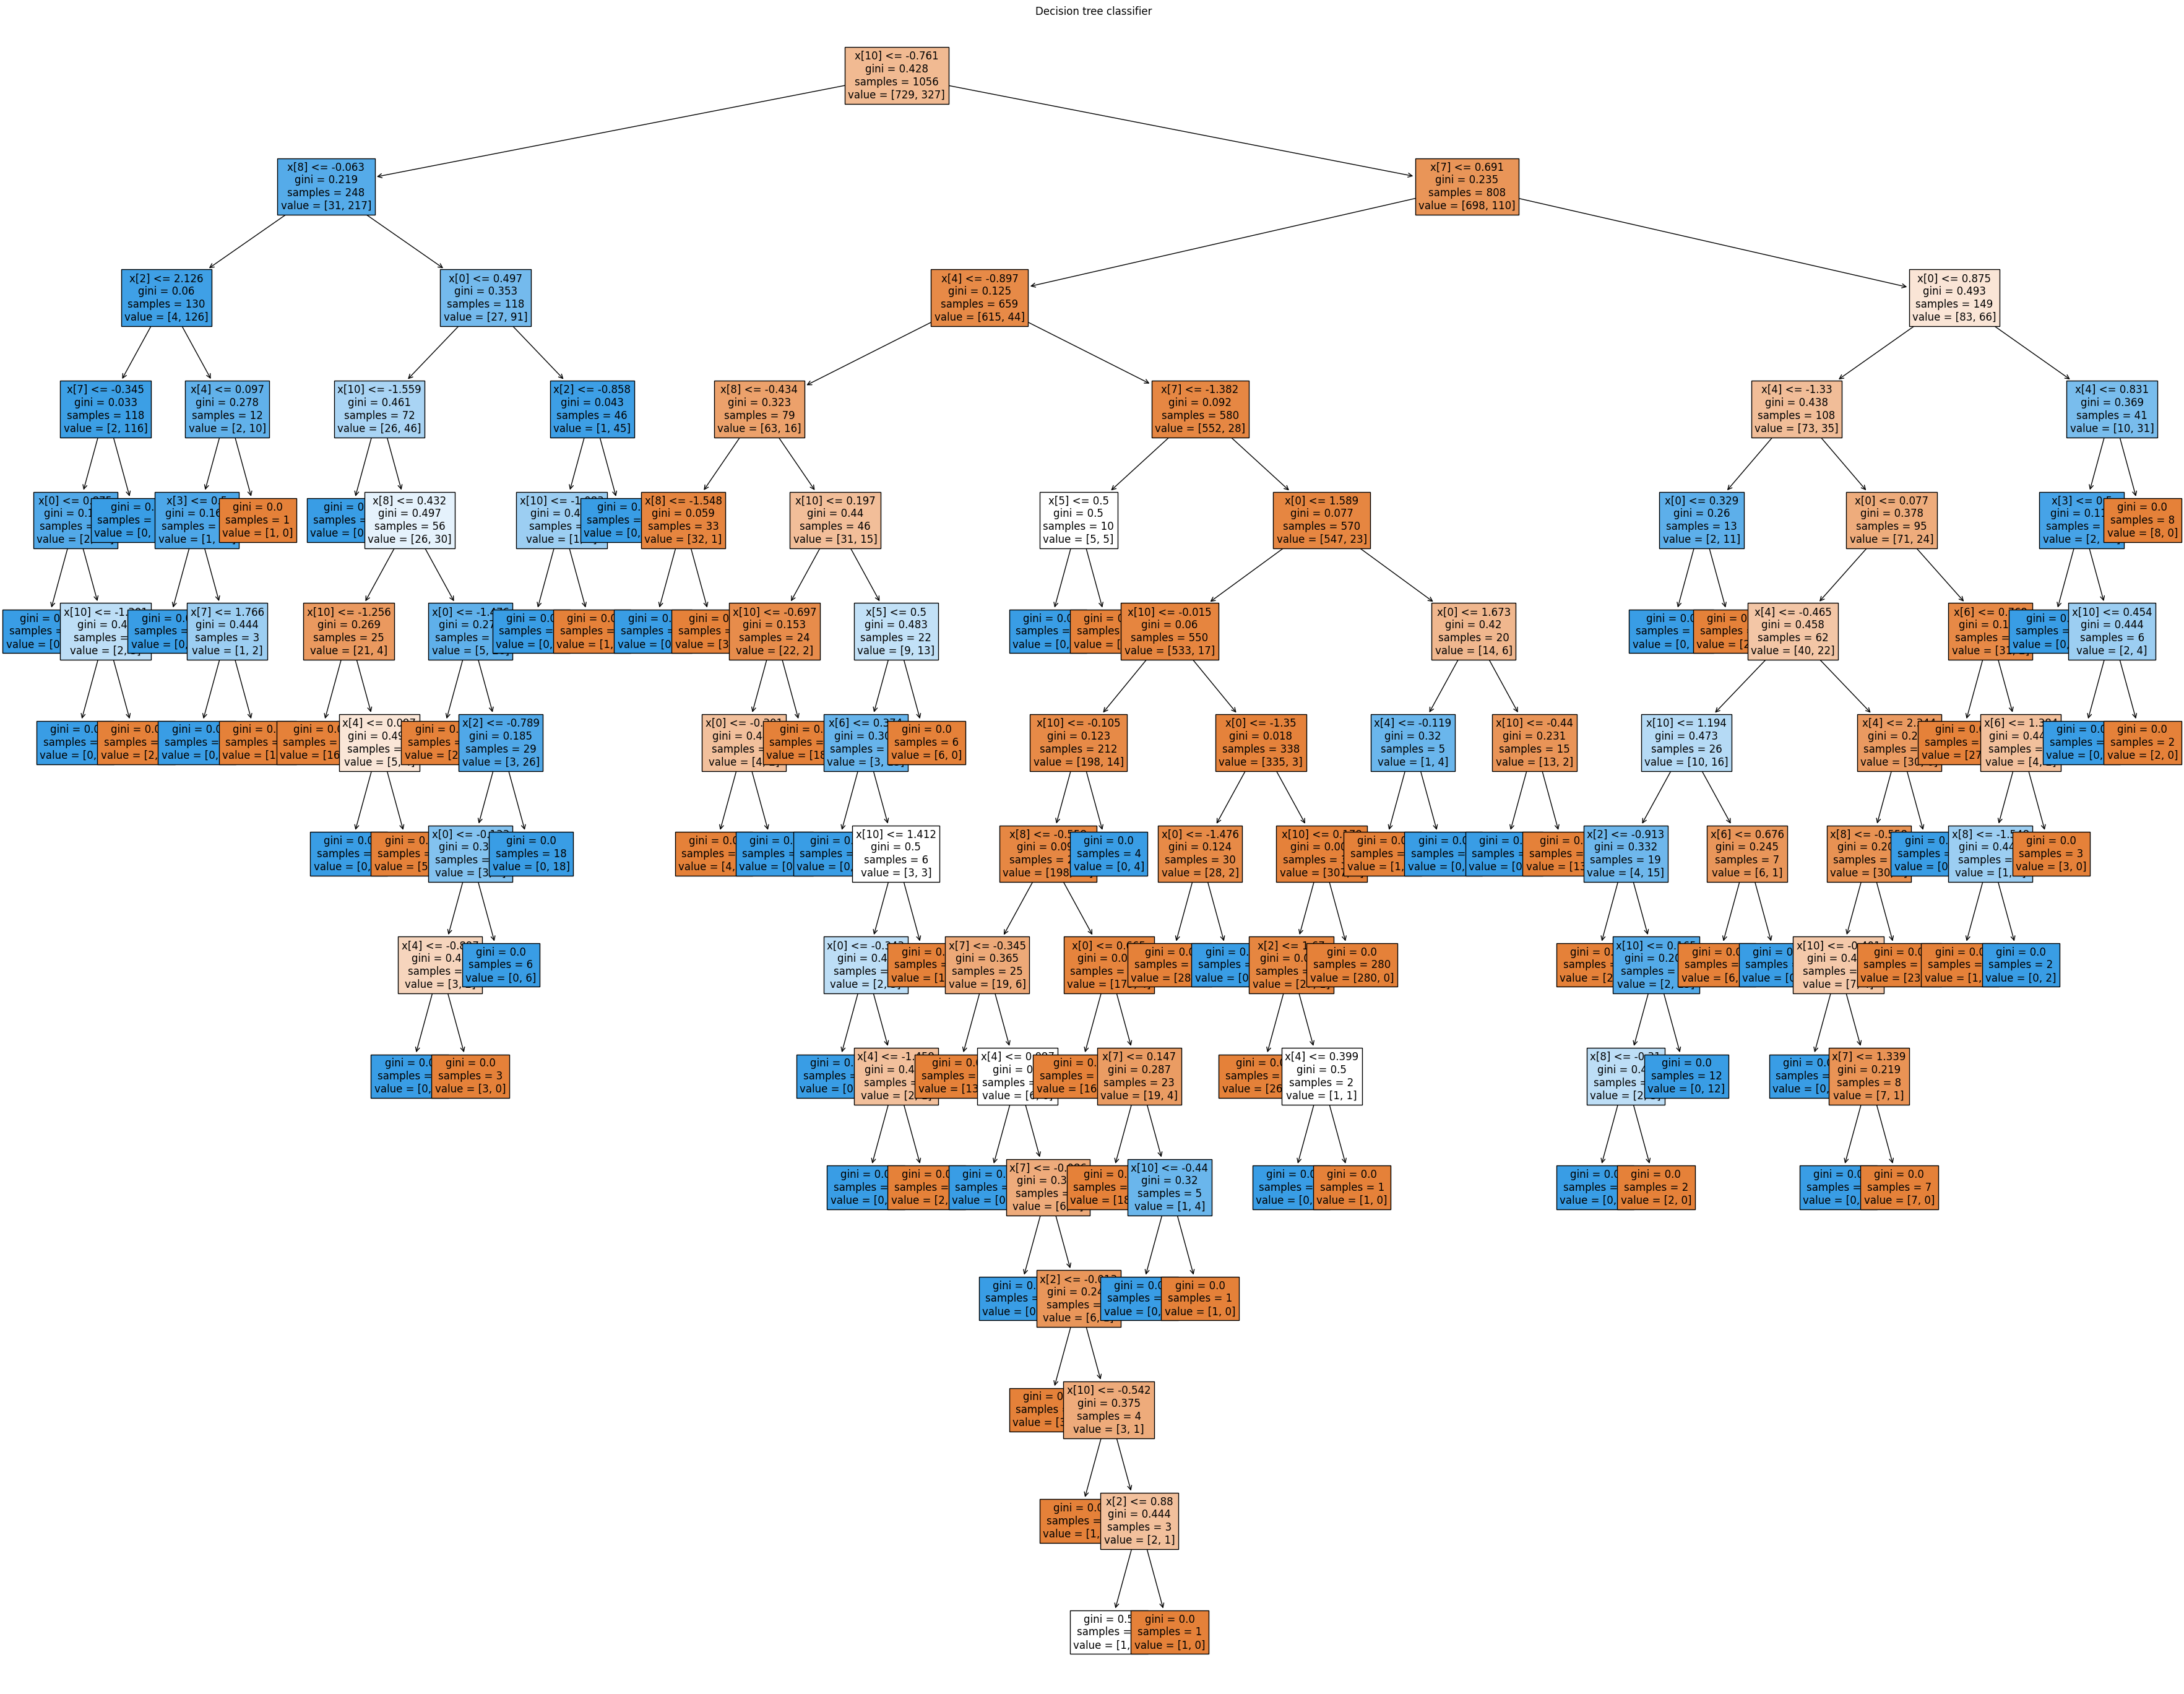

In [25]:
plt.figure(figsize=(45,35))
plot_tree(tree_classifier, filled = True, fontsize=12)
plt.title('Decision tree classifier')
plt.show()

SVM model training accuracy: 93.18181818181817
SVM model test accuracy: 91.28787878787878

The classification report of the model 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       194
           1       0.89      0.77      0.82        70

    accuracy                           0.91       264
   macro avg       0.90      0.87      0.88       264
weighted avg       0.91      0.91      0.91       264

The confusion matrix 
 [[187   7]
 [ 16  54]]


<Axes: >

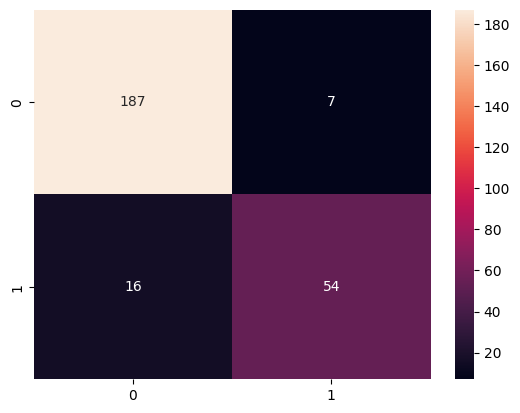

In [26]:
from sklearn.svm import SVC

svc_data = data.copy()

x = svc_data.drop(labels = ['smoking','DEATH_EVENT'], axis =1)
y = svc_data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

svm_classifier = SVC(C=1.5, kernel= 'rbf',random_state = 42)
svm_classifier.fit(X_train,y_train)

y_train_pred = svm_classifier.predict(X_train)
y_pred = svm_classifier.predict(X_test)

print("SVM model training accuracy:", accuracy_score(y_train, y_train_pred)*100)
print("SVM model test accuracy:", accuracy_score(y_test, y_pred)*100)

print('\nThe classification report of the model \n',classification_report(y_test, y_pred))
print('The confusion matrix \n',confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt=".0f")

RandomForest Classifier model training accuracy: 99.90530303030303
RandomForest Classifier model test accuracy: 95.45454545454545

The classification report of the model 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       194
           1       0.93      0.90      0.91        70

    accuracy                           0.95       264
   macro avg       0.95      0.94      0.94       264
weighted avg       0.95      0.95      0.95       264

The confusion matrix 
 [[189   5]
 [  7  63]]


<Axes: >

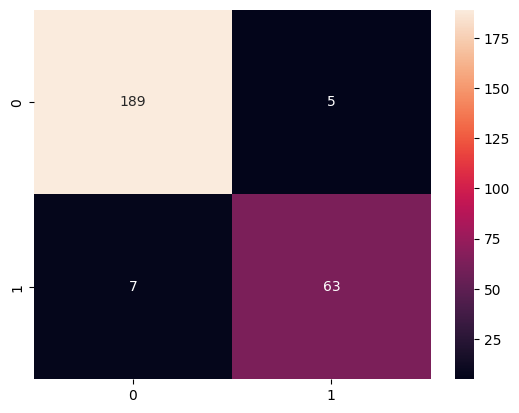

In [27]:
from sklearn.ensemble import RandomForestClassifier
randomforest_data = data.copy()

x = randomforest_data.drop(labels = ['smoking','DEATH_EVENT'], axis =1)
y = randomforest_data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

randomforest_classifier = RandomForestClassifier(random_state=42)
randomforest_classifier.fit(X_train,y_train)

y_train_pred = randomforest_classifier.predict(X_train)
y_pred = randomforest_classifier.predict(X_test)

print("RandomForest Classifier model training accuracy:", accuracy_score(y_train, y_train_pred)*100)
print("RandomForest Classifier model test accuracy:", accuracy_score(y_test, y_pred)*100)

print('\nThe classification report of the model \n',classification_report(y_test, y_pred))
print('The confusion matrix \n',confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt=".0f")


The Random Forest model and Decision Tree model performs better compared to SVM, Logistic Regression and Naive Bayes classifier.

In [28]:
import pickle
##saving the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(randomforest_classifier, f)